In [2]:
#pip list

In [3]:
#pip install opencv-python matplotlib imageio gdown tensorflow

In [4]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

/Users/dennislaw/lip_readingenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

1. Build Data Loading Functions

In [2]:
import gdown
import zipfile

/Users/dennislaw/lip_readingenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# url = 'https://drive.google.com/uc?id=1gy0EA2pVuPOXRTMJNQfDNouqlWe6V7B8'
# output = 'data_cantonese_1.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('data_cantonese_1.zip')

Downloading...
From: https://drive.google.com/uc?id=1gy0EA2pVuPOXRTMJNQfDNouqlWe6V7B8
To: /Users/dennislaw/Downloads/lip_reading_model/data_cantonese_1.zip
100%|█████████████████████████████████████████| 256k/256k [00:00<00:00, 459kB/s]


BadZipFile: File is not a zip file

In [9]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[1200:1500,:,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [10]:
# Define your set of Cantonese phonemes using patterns for initials, finals, and tones
cantonese_phonemes = {}

# Generalize initial patterns (e.g., 'b' for labial, 'd' for dental, etc.)
initials = ['b', 'p', 'm', 'f', 'd', 't', 'n', 'l', 'g', 'k', 'ng', 'h', 'gw', 'kw', 'w', 'z', 'c', 's', 'j']
finals = ['aa', 'aai', 'aau', 'aam', 'aan', 'aang', 'aap', 'aat', 'aak', 'ai', 'au', 'am', 'an', 'ang', 'ap', 'at', 'ak', 'e', 'ei','eoi', 'eu', 'em', 'eng', 'ep', 'ek', 'i', 'iu', 'im', 'in', 'ing', 'ip', 'it', 'ik', 'o', 'oi', 'ou', 'on', 'ong', 'ot', 'ok', 'u', 'ui', 'un', 'ung', 'ut', 'uk', 'oe', 'oey', 'oen', 'oeng', 'oet', 'oek', 'y', 'yn', 'yn', 'm', 'ng']
tones = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

# Generate the Cantonese phonemes using combinations of initials, finals, and tones
for initial in initials:
    for final in finals:
        for tone in tones:
            # Create the key as a combination of initial, final, and tone
            key = initial + final + tone
            # Assign a unique integer representation for the key
            value = len(cantonese_phonemes)
            cantonese_phonemes[key] = value

# Test the mapping
sample_initial = 'ng'
sample_final = 'oi'
sample_tone = '3'

# Use -1 as the separator
separator = -1

# Add separators
integer_representation = []

integer_representation.append(cantonese_phonemes.get(sample_initial + sample_final + sample_tone, -1))

# Add the separator
integer_representation.append(separator)

decoded_initial = sample_initial
decoded_final = sample_final
decoded_tone = sample_tone

print(f"Initial '{sample_initial}' + Final '{sample_final}' is represented as integer sequence: {integer_representation}")


Initial 'ng' + Final 'oi' is represented as integer sequence: [5348, -1]


In [11]:
len(cantonese_phonemes)

9576

In [12]:
cantonese_phonemes

{'baa1': 0,
 'baa2': 1,
 'baa3': 2,
 'baa4': 3,
 'baa5': 4,
 'baa6': 5,
 'baa7': 6,
 'baa8': 7,
 'baa9': 8,
 'baai1': 9,
 'baai2': 10,
 'baai3': 11,
 'baai4': 12,
 'baai5': 13,
 'baai6': 14,
 'baai7': 15,
 'baai8': 16,
 'baai9': 17,
 'baau1': 18,
 'baau2': 19,
 'baau3': 20,
 'baau4': 21,
 'baau5': 22,
 'baau6': 23,
 'baau7': 24,
 'baau8': 25,
 'baau9': 26,
 'baam1': 27,
 'baam2': 28,
 'baam3': 29,
 'baam4': 30,
 'baam5': 31,
 'baam6': 32,
 'baam7': 33,
 'baam8': 34,
 'baam9': 35,
 'baan1': 36,
 'baan2': 37,
 'baan3': 38,
 'baan4': 39,
 'baan5': 40,
 'baan6': 41,
 'baan7': 42,
 'baan8': 43,
 'baan9': 44,
 'baang1': 45,
 'baang2': 46,
 'baang3': 47,
 'baang4': 48,
 'baang5': 49,
 'baang6': 50,
 'baang7': 51,
 'baang8': 52,
 'baang9': 53,
 'baap1': 54,
 'baap2': 55,
 'baap3': 56,
 'baap4': 57,
 'baap5': 58,
 'baap6': 59,
 'baap7': 60,
 'baap8': 61,
 'baap9': 62,
 'baat1': 63,
 'baat2': 64,
 'baat3': 65,
 'baat4': 66,
 'baat5': 67,
 'baat6': 68,
 'baat7': 69,
 'baat8': 70,
 'baat9': 71,
 '

In [13]:
import tensorflow as tf

# Create a mapping function for Cantonese phonemes to integers
def phonemes_to_nums(phonemes):
    return tf.constant([cantonese_phonemes.get(phoneme, -1) for phoneme in phonemes], dtype=tf.int64)

# Create a mapping function for integers to Cantonese phonemes
def nums_to_phonemes(nums):
    return tf.constant([next((key for key, value in cantonese_phonemes.items() if value == num), None) for num in nums], dtype=tf.string)

# Test the mapping functions with lists
sample_phonemes = ['baa1', 'zai6', 'mou5']
sample_integers = phonemes_to_nums(sample_phonemes)

decoded_phonemes = nums_to_phonemes(sample_integers)

print(f"Phonemes {sample_phonemes} are represented as integers: {sample_integers}")
print(f"Integers {sample_integers} are represented as phonemes: {decoded_phonemes}")


Phonemes ['baa1', 'zai6', 'mou5'] are represented as integers: [   0 7646 1327]
Integers [   0 7646 1327] are represented as phonemes: [b'baa1' b'zai6' b'mou5']


In [14]:
phonemes_to_nums(['ngo1', 'zai6'])

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([5337, 7646])>

In [15]:
type(nums_to_phonemes([7511,7646]))

tensorflow.python.framework.ops.EagerTensor

In [16]:
nums_to_phonemes([7511,7646])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'woet6', b'zai6'], dtype=object)>

In [17]:
type(sample_phonemes)

list

In [18]:
type(sample_integers)

tensorflow.python.framework.ops.EagerTensor

In [19]:
def load_alignments(path: str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens.extend([' ', line[2]])

    # print("Tokens:", tokens)

    # Filter out empty elements
    tokens = list(filter(lambda x: x.strip() != '', tokens))

    # Convert tokens to integers using phonemes_to_nums
    integer_representation = phonemes_to_nums(tokens)

    # print("Integer representation:", integer_representation)

    # Remove the first element (-1) and return the rest
    return integer_representation[1:]


In [20]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data_cantonese','s1',f'{file_name}.MOV')
    alignment_path = os.path.join('data_cantonese','alignment','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [21]:
test_path = './data_cantonese/s1/IMG_8765.MOV'

In [22]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'IMG_8765'

In [23]:
load_data(tf.convert_to_tensor(test_path))

(<tf.Tensor: shape=(121, 300, 1080, 1), dtype=float32, numpy=
 array([[[[2.7950177],
          [2.7950177],
          [2.7950177],
          ...,
          [2.1373665],
          [2.1373665],
          [2.1373665]],
 
         [[2.7950177],
          [2.7950177],
          [2.7950177],
          ...,
          [2.1373665],
          [2.1373665],
          [2.1373665]],
 
         [[2.7950177],
          [2.7950177],
          [2.7950177],
          ...,
          [2.1373665],
          [2.1373665],
          [2.1373665]],
 
         ...,
 
         [[2.7950177],
          [2.7950177],
          [2.7950177],
          ...,
          [2.207829 ],
          [2.207829 ],
          [2.2313166]],
 
         [[2.7950177],
          [2.7950177],
          [2.7950177],
          ...,
          [2.1373665],
          [2.1608539],
          [2.1608539]],
 
         [[2.7950177],
          [2.7950177],
          [2.7950177],
          ...,
          [2.113879 ],
          [2.1373665],
          [2

In [24]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [25]:
len(frames)

121

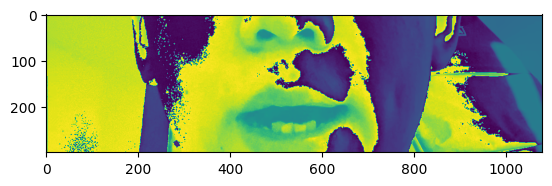

In [26]:
plt.imshow(frames[30])

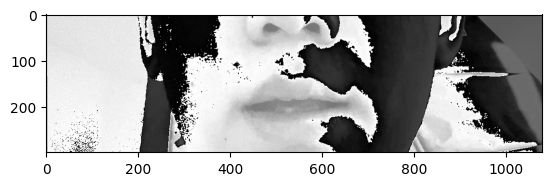

In [27]:
plt.imshow(frames[0, :, :, 0], cmap='gray')

In [28]:
alignments

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([4331, 5630, 9207, 4331, 7821, 8371, 4187, 5882, 1373])>

In [29]:
tf.strings.reduce_join([bytes.decode(x) for x in nums_to_phonemes(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'go3hai6jat1go3zing1coi2ge3hong6mu6'>

In [30]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

2. Create Data Pipeline

In [31]:
from matplotlib import pyplot as plt

In [52]:
data = tf.data.Dataset.list_files('./data_cantonese/s1/*.MOV')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(1, padded_shapes=([150,None,None,None],[10]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
# Determine the sizes for training and testing sets
total_samples = 50
train_size = int(0.8 * total_samples)

# Split the data
train_data = data.take(train_size)
test_data = data.skip(train_size)

In [53]:
len(test_data)

10

In [54]:
len(data)

50

In [55]:
frames, alignments = data.as_numpy_iterator().next()

In [56]:
# import cv2

# def get_video_length(video_path):
#     cap = cv2.VideoCapture(video_path)
#     length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     cap.release()
#     return length

# # Example usage
# video_path = "./data_cantonese/s1/IMG_8748.MOV"
# length = get_video_length(video_path)
# print(f"The video has {length} frames.")


In [57]:
# import os
# import cv2

# def count_frames(video_path):
#     cap = cv2.VideoCapture(video_path)
#     total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     cap.release()
#     return total_frames

# def list_videos_with_few_frames(directory, threshold=200):
#     videos_with_few_frames = []

#     for file in os.listdir(directory):
#         if file.endswith(('.mp4', '.avi', '.MOV', '.mkv')):
#             video_path = os.path.join(directory, file)
#             frame_count = count_frames(video_path)

#             if frame_count < threshold:
#                 videos_with_few_frames.append((file, frame_count))

#     return videos_with_few_frames

# # Example usage
# directory_path = "./data_cantonese/s1"
# videos_with_few_frames = list_videos_with_few_frames(directory_path)

# if videos_with_few_frames:
#     print("Videos with fewer than 75 frames:")
#     for video, frame_count in videos_with_few_frames:
#         print(f"{video}: {frame_count} frames")
# else:
#     print("No videos with fewer than 75 frames.")



In [58]:
len(frames)

1

In [59]:
sample = data.as_numpy_iterator()

In [60]:
val = sample.next(); val[0]

array([[[[[2.3816736],
          [2.3816736],
          [2.3816736],
          ...,
          [1.1691852],
          [1.1691852],
          [1.1691852]],

         [[2.3816736],
          [2.3816736],
          [2.3816736],
          ...,
          [1.1691852],
          [1.1691852],
          [1.1691852]],

         [[2.3816736],
          [2.3816736],
          [2.3816736],
          ...,
          [1.1691852],
          [1.1691852],
          [1.1691852]],

         ...,

         [[2.3816736],
          [2.3816736],
          [2.3816736],
          ...,
          [1.2557914],
          [1.2557914],
          [1.2557914]],

         [[2.3816736],
          [2.3816736],
          [2.3816736],
          ...,
          [1.2557914],
          [1.2557914],
          [1.2557914]],

         [[2.3816736],
          [2.3816736],
          [2.3816736],
          ...,
          [1.2557914],
          [1.2557914],
          [1.2557914]]],


        [[[2.3816736],
          [2.3816736],
       

In [61]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

Lossy conversion from float32 to uint8. Range [0.0, 5.521152019500732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 5.521152019500732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 5.521152019500732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 5.521152019500732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 5.521152019500732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 5.521152019500732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 5.521152019500732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

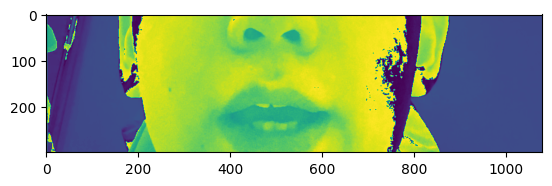

In [62]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [63]:
tf.strings.reduce_join([nums_to_phonemes(word) for word in [val[1][0]]])

<tf.Tensor: shape=(), dtype=string, numpy=b'ngoi3gan2zoeng1ci1gik1ge3wut6dung3baa1baa1'>

In [64]:
len(val[1][0])

10

In [65]:
for word in val[1][0]:
    print(word)

5348
4141
8001
8289
4320
4187
7457
2405
0
0


3. Design the Deep Neural Network

In [66]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [67]:
data.as_numpy_iterator().next()[0][0].shape

(150, 300, 1080, 1)

In [68]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(150,300,1080,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(len(cantonese_phonemes)+1, kernel_initializer='he_normal', activation='softmax'))

In [69]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 150, 300, 1080,    3584      
                             128)                                
                                                                 
 activation (Activation)     (None, 150, 300, 1080,    0         
                             128)                                
                                                                 
 max_pooling3d (MaxPooling3  (None, 150, 150, 540, 1   0         
 D)                          28)                                 
                                                                 
 conv3d_1 (Conv3D)           (None, 150, 150, 540, 2   884992    
                             56)                                 
                                                                 
 activation_1 (Activation)   (None, 150, 150, 540, 2   0

In [70]:
yhat = model.predict(val[0], batch_size=4)

1/1 [==============================] - 880s 880s/step


In [71]:
tf.strings.reduce_join([nums_to_phonemes(x) for x in [tf.argmax(yhat[0],axis=1)]])

<tf.Tensor: shape=(), dtype=string, numpy=b'kwon8kwon8kwon8kwon8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8kwoe4haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8haang8li8li8li8li8li8gwuk4gwuk4gwuk4gwuk4gwuk4gwuk4seoi1seoi1seoi1seoi1seoi1jung8jung8jung8jung8jung8jung8jung8jung8jung8jung8'>

In [72]:
tf.strings.reduce_join([nums_to_phonemes(tf.argmax(x)) for x in [yhat[0]]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bap7baa3bat8baa2bap5baa1bap1bam1bak6ban3baa1bak6bak6baa1bat2bap7bak6baa1baa3baa1baa3bai4bat1bap3bak4bak6baap9baa1bak6baa4baam8baau2baau8bang9bap8bat2bap3baam9baai1baam2bang8bang9baa1baat8bap4bap2bap2baat6baau1baa3bam9baai7bat1bap7baa5bam8bau4baan6baan4bak6baa1bak6bak6baa1bat6bang6baa1ban3baa3ban7bai1bak6bai3baan8bau5bat7bak6bat5bam6bap7baa1bat2bak6bak6bak6bak6bap6bak6baam7baai6baat8bak6bak6baam7bam8baan1baa1bau9bai4bap4bap5bang7bap2baam1baau1baak2baa1baam7baa5bak6bam6baa1bai4bak6baa2baat5bap4bat3baat3bai4baa1bau8bak6bai2bap2baak5bap4bat2bak6baai3baang3bap1baa1bat4baa2bak6bang6baan8bap2bap8bang8bai3bat1bap6baa5bang7bap6ban2bang1bak6bap3bam3baang9ban9bam7bak6baat2baat8baa1bak6bap6bap1baai4bam6bam2bang8baa1bang8baa1bap2bak1bak6bak6bak6bai4baa3bap9bap7bak6ban1bai7bak6bang6baa2bau7baai5baa5bap3baa5bak6baang8baat4baang7baa5bak6bam8baa4bat3bat1bau4bap1baam9baan5bang9bap6baa9baam7bam1ban2bau9bang7bat2baa1baai2baa3bak3bap9bau7bap1bap3bat1bak6bak6bak6b

In [73]:
model.input_shape

(None, 150, 300, 1080, 1)

In [74]:
model.output_shape

(None, 150, 9577)

4. Setup Training Options and Train

In [75]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [76]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [77]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(nums_to_phonemes(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(nums_to_phonemes(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [78]:
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
, loss=CTCLoss)

In [79]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [80]:
schedule_callback = LearningRateScheduler(scheduler)

In [81]:
example_callback = ProduceExample(test_data)

In [ ]:
model.fit(train_data, validation_data=test_data, epochs=50, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/50
